# EDA

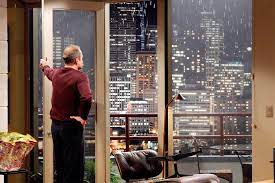

In [25]:
# --- EDA Project December 2025 - Data Science & AI Bootcamp - by Helge Linnert ---

# library imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# project imports
from src.ccleaning import clean_data

# configurations - needed? 
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
#pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [27]:
# read data, clean it and print
df = pd.read_csv("data/eda_project.csv")
df = clean_data(df)
df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1.00,1180.00,5650.00,1.00,0,0.00,3,7,...,0.00,1955,0,98178,47.51,-122.26,1340.00,5650.00,2014-10-13,221900.00
1,6414100192,3,2.25,2570.00,7242.00,2.00,0,0.00,3,7,...,400.00,1951,19910,98125,47.72,-122.32,1690.00,7639.00,2014-12-09,538000.00
2,5631500400,2,1.00,770.00,10000.00,1.00,0,0.00,3,6,...,0.00,1933,0,98028,47.74,-122.23,2720.00,8062.00,2015-02-25,180000.00
3,2487200875,4,3.00,1960.00,5000.00,1.00,0,0.00,5,7,...,910.00,1965,0,98136,47.52,-122.39,1360.00,5000.00,2014-12-09,604000.00
4,1954400510,3,2.00,1680.00,8080.00,1.00,0,0.00,3,8,...,0.00,1987,0,98074,47.62,-122.05,1800.00,7503.00,2015-02-18,510000.00


In [32]:
# create columns, definitions, etc needed to test hypotheses 1-3


# -- create column: True if ever a renovation was undertaken
df['status_renovated'] = (df['yr_renovated'] > 0)

# -- create columns: price/sqft_living & price/sqft_lot (pps = price-per-squarefootage)
df['pps_living'] = (df['price']/df['sqft_living'])
df['pps_lot'] = (df['price']/df['sqft_lot'])

# -- sort year order ascending
yr_order = sorted(df['yr_built'].unique())

# -- create bins for build year - code by CGPT
bins = list(range(1900, 2030, 10))
labels = [
    '1900s','10s','20s','30s',
    '40s','50s','60s','70s',
    '80s','90s','2000s','2010s'
]

df['yr_build_decade'] = pd.cut(
    df['yr_built'],
    bins=bins,
    labels=labels,
    right=False    
)


# -- arrays of zip codes and set location type based on zip code
# Some zipcodes pertain to more than one city/region. Here: only unique zipcodes are used
# Source: https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx

seattle_only_zip = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98109, 98111,
                98112, 98114, 98115, 98116, 98117,98118, 98119, 98121, 98122,
                98124, 98125, 98126, 98131, 98132, 98134, 98136, 98144, 98145,
                98154,98160, 98161, 98164, 98171, 98174, 98199
                ]

bellevue_only_zip = [98004, 98005, 98006, 98007, 98008, 98009, 98015
                    ]

kent_only_zip = [98030, 98031, 98032, 98035, 98042, 98064
                ]

renton_only_zip = [98055, 98056, 98057, 98058, 98059
                  ]

federalway_only_zip = [98001, 98003, 98023, 98063, 98093
                      ]


# king county without Seattle
kc_wo_seattle = [
                98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98009,
                98010, 98011, 98013, 98014, 98015, 98019, 98022, 98023, 98024,
                98025, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034,
                98035, 98038, 98039, 98040, 98041, 98042, 98045, 98047, 98050,
                98051, 98052, 98053, 98054, 98055, 98056, 98057, 98058, 98059,
                98062, 98063, 98064, 98065, 98068, 98070, 98071, 98072, 98073,
                98074, 98075, 98083, 98092, 98093, 98108, 98133, 98138, 98146,
                98148, 98155, 98158, 98166, 98168, 98177, 98178, 98188, 98198,
                98224, 98288, 98077
                ]

# zipcodes of places with population < 100K
kc_wo_cities = [98002, 98010, 98011, 98013, 98014, 98019, 98022, 98024, 98025,
                98027, 98028, 98029, 98033, 98034, 98038, 98039, 98040, 98041, 
                98045, 98047, 98050, 98051, 98052, 98053, 98054, 98062, 98065, 
                98068, 98070, 98071, 98072, 98073, 98074, 98075, 98083, 98092, 
                98224, 98288
               ]

# king county zipcodes including seattle (not used here)
kc_total_zip = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98009, 
                98010, 98011, 98013, 98014, 98015, 98019, 98022, 98023, 98024, 
                98025, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 
                98035, 98038, 98039, 98040, 98041, 98042, 98045, 98047, 98050, 
                98051, 98052, 98053, 98054, 98055, 98056, 98057, 98058, 98059, 
                98062, 98063, 98064, 98065, 98068, 98070, 98071, 98072, 98073, 
                98074, 98075, 98083, 98092, 98093, 98101, 98102, 98103, 98104, 
                98105, 98106, 98107, 98108, 98109, 98111, 98112, 98114, 98115, 
                98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 
                98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 
                98148, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 
                98171, 98174, 98177, 98178, 98188, 98198, 98199, 98224, 98288
                ]


# assign values based on zipcode lists
# nested np.where method works because zipcode lists are mutually exclusive
df['location_type'] = np.where(
    df['zipcode'].isin(seattle_only_zip),
    'Seattle',
    np.where( 
        df['zipcode'].isin(bellevue_only_zip),
        'Bellevue',
        np.where(
            df['zipcode'].isin(kent_only_zip),
            'Kent',
            np.where(
                df['zipcode'].isin(renton_only_zip),
                'Renton',
                np.where(
                    df['zipcode'].isin(federalway_only_zip),
                    'Federal Way',
                    np.where(
                        df['zipcode'].isin(kc_wo_seattle),
                        'King County without Cities',
                        'Outside King County' 
                    )
                )
            )
        )
    )
)


# order location_type as list
location_order = df.groupby('location_type')['pps_living'].mean().sort_values(ascending=False).index

# -- key variable :
# sqft_living = sqft_living15 in 12% of data (2563 rows)
# key variable a)
df['sqft_greater'] = df['sqft_living'] > df['sqft_living15']

# key variable b)
df['sqft_diff'] = df['sqft_living']-df['sqft_living15']

# key variable c) 
df['sqft_ratio'] = df['sqft_living']/df['sqft_living15']



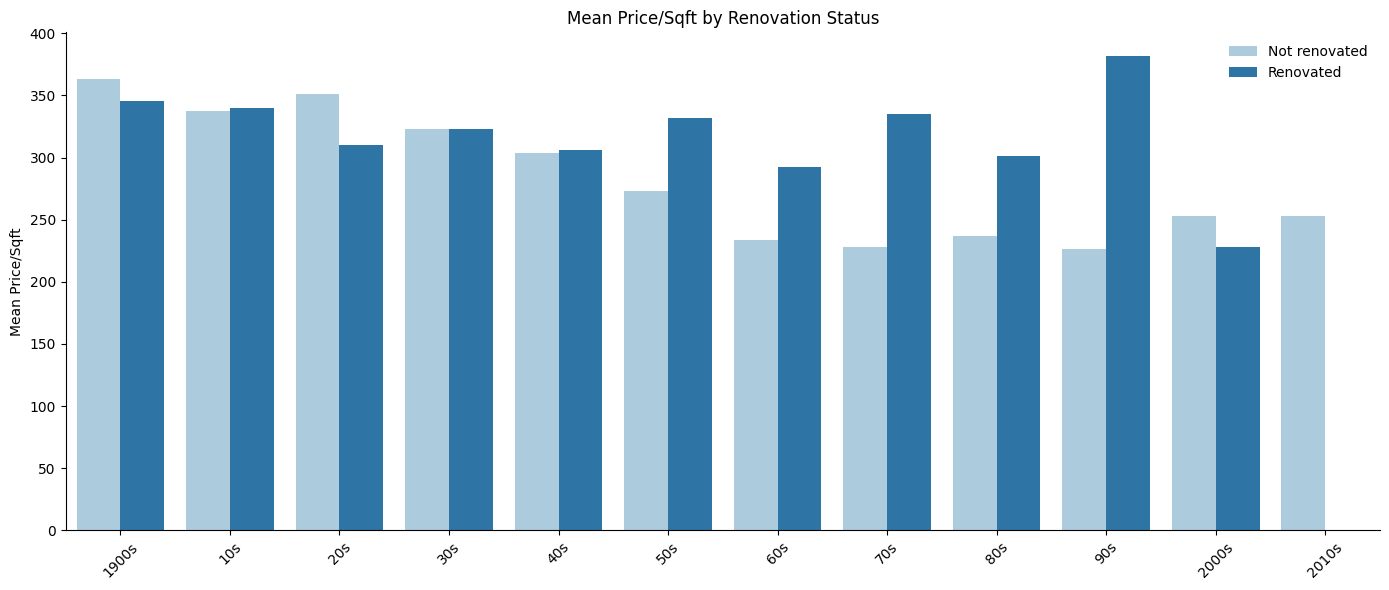

In [29]:
# Plot - Hypothesis 1
# "Renovated houses have a higher mean price/sqft than unrenovated houses built the same year."

# -- define final plot
plt.figure(figsize=(14, 6))

#sns.set_palette("Set2")
final_plot = sns.barplot(
    data=df,
    x='yr_build_decade',
    y='pps_living', # seaborn calculates mean
    hue='status_renovated',
    errorbar=None, #or 'sd' to show standard deviation errorbar
    #errwidth=0.5, #width of errorbar
    palette='Paired',
    saturation=0.8,
)


# -- text in plot
plt.xlabel(None)
plt.ylabel("Mean Price/Sqft")
plt.title("Mean Price/Sqft by Renovation Status")

# -- reduce ink
sns.despine()
plt.legend(labels=['Not renovated', 'Renovated'], title=None, frameon=False)

# -- print layout
plt.xticks(rotation=45) #turn labels on x-axis
plt.tight_layout()
plt.show()


In [35]:
# re Hypothesis 1
# -- high error margin 1990-1999 due to noisy sample: only 3 renovated houses in that bin.

check = (
    df[df['yr_build_decade'] == '90s']
      .groupby('status_renovated')['pps_living']
      .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
)
print(check)


                  count   mean  median    std    min    max
status_renovated                                           
False              2229 226.51  215.79  81.37  97.04 790.82
True                  3 381.64  313.02 291.47 130.60 701.30


In [34]:
# re Hypothesis 1
# standard deviation not shown because renovated houses = 1. 
# dataset is from 2015. It is likely that very few houses needed renovation within 15 years after construction.
check = (
    df[df['yr_build_decade'] == '2000s']
      .groupby('status_renovated')['pps_living']
      .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
)
print(check)



                  count   mean  median   std    min    max
status_renovated                                          
False              3514 252.98  238.15 96.11  87.71 800.00
True                  1 227.90  227.90   NaN 227.90 227.90


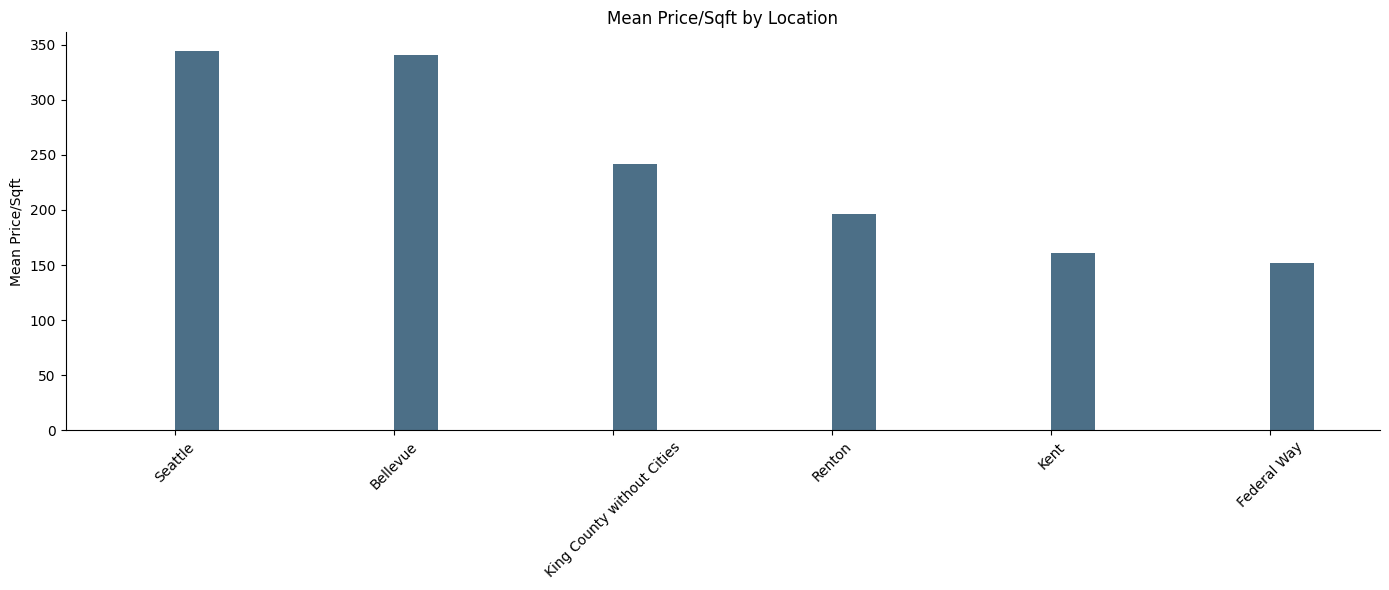

In [38]:
# Hypothesis 2 
# "Houses in Seattle have a higher mean price/sqft than houses in the rest of King County (by zip code)."

# -- define data final plot
plt.figure(figsize=(14, 6))

final_plot = sns.barplot(
    data=df,
    x='location_type',
    y='pps_living', # seaborn calculates mean
    order=location_order, #sorted by highest mean
    errorbar=None, #'sd' to show standard deviation errorbar
    #errwidth=0.5, #width of errorbar
    #palette='bright',
    saturation=0.4
)

# -- bar width and recenter - by cgpt
for bar in final_plot.patches:
    bar.set_width(0.2)

for bar in final_plot.patches:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + (1 - w) / 2)

# -- text in plot
plt.xlabel(None)
plt.ylabel("Mean Price/Sqft")
plt.title("Mean Price/Sqft by Location")

# -- remove top and right frame
sns.despine()

# -- plot design
plt.xticks(rotation=45) #turn labels on x-axis
plt.tight_layout()

# -- show plot
plt.show()

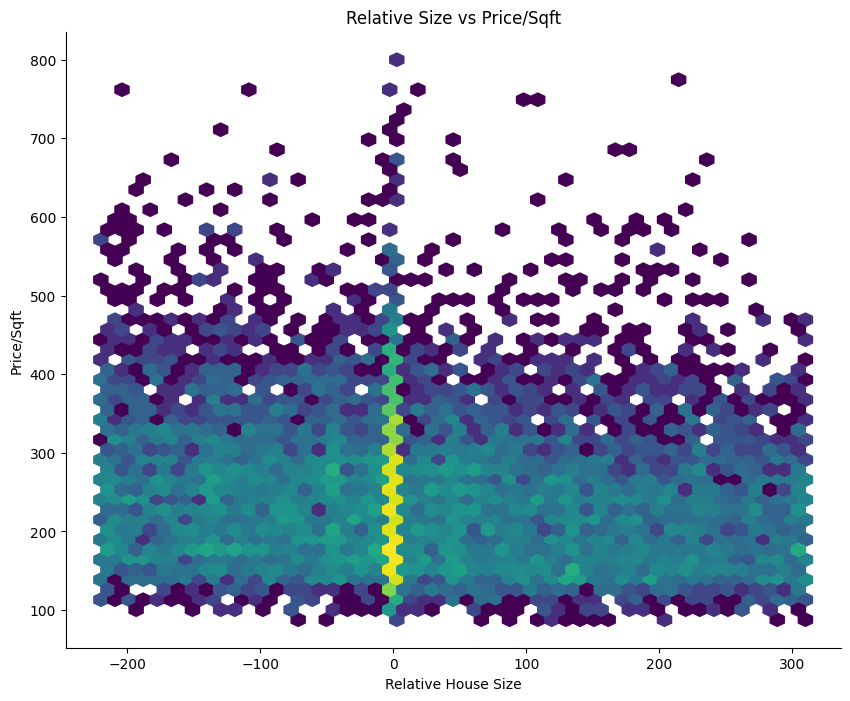

In [13]:
# plot re Hypothesis 3
# "When square footage of living space is greater than that of the neighbors, price/sqft is higher."
# in other words H3: "My house is more expensive if my neighbors have smaller houses -> my pps is higher."


# -- define data final plot

# use only IQR to reduce noise
# values from df.describe()
df_iqr = df[df['sqft_diff'].between(-220, 310)]

# -- plot
plt.figure(figsize=(10,8))
plt.hexbin(df_iqr['sqft_diff'], df_iqr['pps_living'], gridsize=50, bins='log')

# -- plot text 
#plt.colorbar(label='log(count)') #optional
plt.xlabel("Relative House Size")
plt.ylabel("Price/Sqft")
plt.title("Relative Size vs Price/Sqft")

# -- reduce top and right frame
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)

# -- show plot
plt.show()



    

In [14]:
# re Hypothesis 3

# -- Pearson's r correlation
df[['sqft_ratio', 'pps_living']].corr()

,sqft_ratio,pps_living
sqft_ratio,1.00,-0.22
pps_living,-0.22,1.00


In [36]:
# re Hypothesis 3 - by cgpt

# -- Check how many properties have identical values
identical_count = (df['sqft_living'] == df['sqft_living15']).sum()
total_count = len(df)
percentage = (identical_count / total_count) * 100

print(f"Identical values: {identical_count} out of {total_count}")
print(f"Percentage: {percentage:.2f}%")

# -- Look at some examples
print("\nExamples where sqft_living == sqft_living15:")
print(df[df['sqft_living'] == df['sqft_living15']][['sqft_living', 'sqft_living15', 'zipcode', 'lat', 'long']].head(10))

Identical values: 2563 out of 21597
Percentage: 11.87%

Examples where sqft_living == sqft_living15:
    sqft_living  sqft_living15  zipcode   lat    long
8       1780.00        1780.00    98146 47.51 -122.34
13      1370.00        1370.00    98074 47.61 -122.05
16      1890.00        1890.00    98019 47.73 -121.96
28      1520.00        1520.00    98115 47.70 -122.30
39      2620.00        2620.00    98056 47.53 -122.18
50      1190.00        1190.00    98148 47.43 -122.32
52      1410.00        1410.00    98117 47.68 -122.38
54      2730.00        2730.00    98105 47.66 -122.28
56      2250.00        2250.00    98042 47.37 -122.11
80      2350.00        2350.00    98038 47.35 -122.01


In [37]:
# re Hypothesis 3 - by cgpt

# -- Check if matches cluster by location
matches = df[df['sqft_living'] == df['sqft_living15']]
no_matches = df[df['sqft_living'] != df['sqft_living15']]

print("Matches by zipcode:")
print(matches['zipcode'].value_counts().head(20))

print("\nMatches by decade built:")
print(matches['yr_build_decade'].value_counts())

# -- Check if these are in developments
print("\nAverage sqft_living for matches:", matches['sqft_living'].mean())
print("Average sqft_living for non-matches:", no_matches['sqft_living'].mean())

Matches by zipcode:
zipcode
98038    105
98103     89
98042     87
98052     72
98133     68
98115     64
98059     63
98053     62
98023     61
98117     59
98126     57
98029     56
98065     56
98034     55
98033     54
98031     54
98074     54
98075     53
98056     53
98106     53
Name: count, dtype: int64

Matches by decade built:
yr_build_decade
2000s    679
90s      322
60s      254
70s      250
2010s    243
80s      231
50s      216
40s      147
20s       92
10s       53
1900s     44
30s       32
Name: count, dtype: int64

Average sqft_living for matches: 1924.8591494342568
Average sqft_living for non-matches: 2101.2554901754756
